## import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## import dataset

In [2]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## perform Exploratory data analysis

In [3]:
df.shape

(27820, 12)

In [4]:
# check for null values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
# this columns are not adding any value to the dataset
df= df.drop(['HDI for year','country-year' ], axis = 1)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [6]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [7]:
# checking for statistial infomation about dataset
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [8]:
# converting the below column to the right datatype and cleaning this column
gdp_for_year = df[' gdp_for_year ($) ']
gdp_for_year = gdp_for_year.apply(lambda x: x.replace(',', ''))
gdp_for_year=gdp_for_year.astype('int64')
gdp_for_year

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name:  gdp_for_year ($) , Length: 27820, dtype: int64

In [9]:
# creating the clean column
df['gdp_for_year'] = gdp_for_year

In [10]:
# droping the unclean column
df.drop(' gdp_for_year ($) ',axis = 1, inplace=True)


In [11]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers,2156624900
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,2309,Generation X,63067077179
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,2309,Silent,63067077179
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,2309,Generation Z,63067077179
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,2309,Generation Z,63067077179


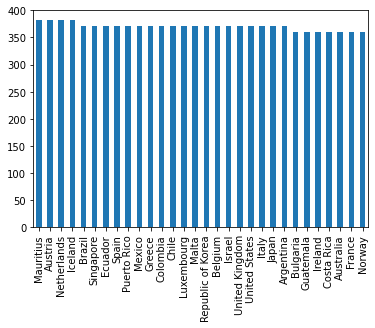

In [12]:
# visualizing the categorical columns
country_counts=df.country.value_counts()
country_counts.head(30).plot(kind='bar')
plt.show()

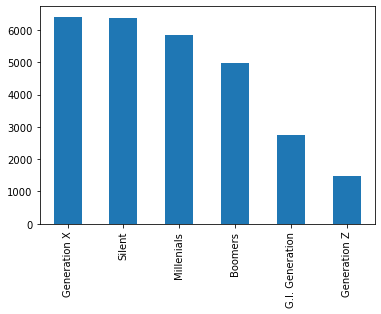

In [13]:
generation_counts=df.generation.value_counts()
generation_counts.plot(kind='bar')
plt.show()

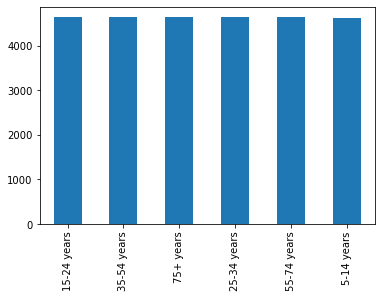

In [14]:
age_counts=df.age.value_counts()
age_counts.plot(kind='bar')
plt.show()

In [15]:
# checking the correlation between features of the dataset
correlation = df.corr()
correlation.style.background_gradient(cmap = 'BrBG')

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gdp_for_year
year,1.000000,-0.004546,0.008850,-0.039037,0.339134,0.094529
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.061330,0.430096
population,0.008850,0.616162,1.000000,0.008285,0.081510,0.710697
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.001785,0.025240
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,1.000000,0.303405
gdp_for_year,0.094529,0.430096,0.710697,0.025240,0.303405,1.000000


In [16]:
# droping high corelated features and checking again
df=df.drop('population', axis=1)
correlation = df.corr()
correlation.style.background_gradient(cmap = 'BrBG')

,year,suicides_no,suicides/100k pop,gdp_per_capita ($),gdp_for_year
year,1.000000,-0.004546,-0.039037,0.339134,0.094529
suicides_no,-0.004546,1.000000,0.306604,0.061330,0.430096
suicides/100k pop,-0.039037,0.306604,1.000000,0.001785,0.025240
gdp_per_capita ($),0.339134,0.061330,0.001785,1.000000,0.303405
gdp_for_year,0.094529,0.430096,0.025240,0.303405,1.000000


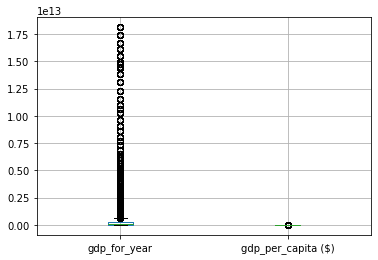

In [17]:
# checking for outliers using boxplot
df.boxplot(column=['gdp_for_year','gdp_per_capita ($)'])
plt.show()

In [18]:
#removing outliers in the dataset
def remove_outliers(df,col):
    threshold = 5
    mean = col.mean()
    std = col.std()
    outliers = np.abs(col-mean) > threshold * std
    df = df[~outliers]
    return df
    
df = remove_outliers(df,df['gdp_for_year'])
df

,country,year,sex,age,suicides_no,suicides/100k pop,gdp_per_capita ($),generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,6.71,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,5.19,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,4.83,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,4.59,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,3.28,796,Boomers,2156624900
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,2.96,2309,Generation X,63067077179
27816,Uzbekistan,2014,female,75+ years,9,2.58,2309,Silent,63067077179
27817,Uzbekistan,2014,male,5-14 years,60,2.17,2309,Generation Z,63067077179
27818,Uzbekistan,2014,female,5-14 years,44,1.67,2309,Generation Z,63067077179


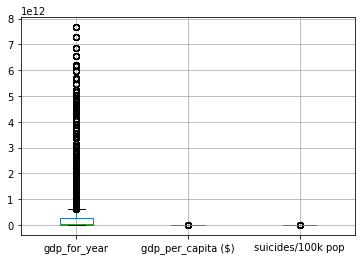

In [19]:
df.boxplot(column=['gdp_for_year','gdp_per_capita ($)','suicides/100k pop'])
plt.show()

In [20]:
# encoding categorical columns
country = pd.get_dummies(df.country)
generation = pd.get_dummies(df.generation)
age = pd.get_dummies(df.age)
df = pd.concat([df,country,generation,age], axis= 1)
df

,country,year,sex,age,suicides_no,suicides/100k pop,gdp_per_capita ($),generation,gdp_for_year,Albania,...,Generation X,Generation Z,Millenials,Silent,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,Albania,1987,male,15-24 years,21,6.71,796,Generation X,2156624900,1,...,1,0,0,0,1,0,0,0,0,0
1,Albania,1987,male,35-54 years,16,5.19,796,Silent,2156624900,1,...,0,0,0,1,0,0,1,0,0,0
2,Albania,1987,female,15-24 years,14,4.83,796,Generation X,2156624900,1,...,1,0,0,0,1,0,0,0,0,0
3,Albania,1987,male,75+ years,1,4.59,796,G.I. Generation,2156624900,1,...,0,0,0,0,0,0,0,0,0,1
4,Albania,1987,male,25-34 years,9,3.28,796,Boomers,2156624900,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,2.96,2309,Generation X,63067077179,0,...,1,0,0,0,0,0,1,0,0,0
27816,Uzbekistan,2014,female,75+ years,9,2.58,2309,Silent,63067077179,0,...,0,0,0,1,0,0,0,0,0,1
27817,Uzbekistan,2014,male,5-14 years,60,2.17,2309,Generation Z,63067077179,0,...,0,1,0,0,0,0,0,1,0,0
27818,Uzbekistan,2014,female,5-14 years,44,1.67,2309,Generation Z,63067077179,0,...,0,1,0,0,0,0,0,1,0,0


In [21]:
# droping the unencoded columns and one of each encoded column to avoid the dummy trap
df=df.drop(['Uzbekistan','Silent','Millenials','age','generation','country' ], axis= 1)
df

,year,sex,suicides_no,suicides/100k pop,gdp_per_capita ($),gdp_for_year,Albania,Antigua and Barbuda,Argentina,Armenia,...,Boomers,G.I. Generation,Generation X,Generation Z,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,1987,male,21,6.71,796,2156624900,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1987,male,16,5.19,796,2156624900,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1987,female,14,4.83,796,2156624900,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1987,male,1,4.59,796,2156624900,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1987,male,9,3.28,796,2156624900,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,female,107,2.96,2309,63067077179,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
27816,2014,female,9,2.58,2309,63067077179,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27817,2014,male,60,2.17,2309,63067077179,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
27818,2014,female,44,1.67,2309,63067077179,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [22]:
# using label encoding to encoded column with only 2 unique value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.sex = le.fit_transform(df.sex)
df

,year,sex,suicides_no,suicides/100k pop,gdp_per_capita ($),gdp_for_year,Albania,Antigua and Barbuda,Argentina,Armenia,...,Boomers,G.I. Generation,Generation X,Generation Z,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,1987,1,21,6.71,796,2156624900,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1987,1,16,5.19,796,2156624900,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1987,0,14,4.83,796,2156624900,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1987,1,1,4.59,796,2156624900,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1987,1,9,3.28,796,2156624900,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,0,107,2.96,2309,63067077179,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
27816,2014,0,9,2.58,2309,63067077179,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27817,2014,1,60,2.17,2309,63067077179,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
27818,2014,0,44,1.67,2309,63067077179,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


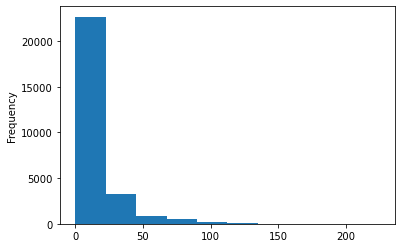

In [23]:
# visualizing the numerical columns
df['suicides/100k pop'].plot(kind='hist')
plt.show()

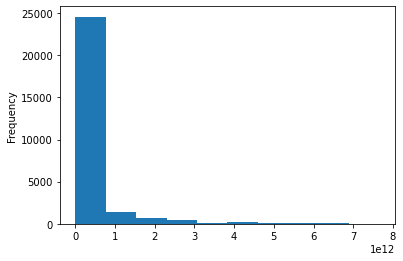

In [24]:
df['gdp_for_year'].plot(kind='hist')
plt.show()

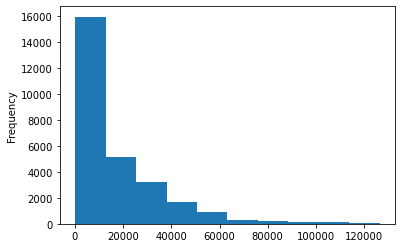

In [25]:
df['gdp_per_capita ($)'].plot(kind='hist')
plt.show()